# Author : Quratulain
## Task 1: Prediction using Unsupervised Machine Learning
*  In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

## Importing libraries


In [1]:
# importing necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
iris_data = pd.read_csv('Iris.csv')
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
iris_data.shape

(150, 6)

We need to find the best value of k for k-means classification using the elbow method and within-cluster sum of squares (WSS).

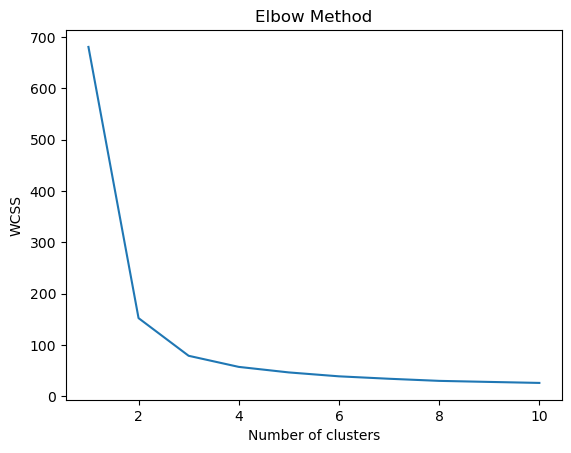

In [6]:
x = iris_data.iloc[:, [1, 2, 3,4]]. values
# Within-cluster sum of squares
wcss = [] 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# Plotting the cluster result elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.show()

The graph shows an elbow shape, indicating that the optimal number of clusters is 3. This aligns with our dataset containing 3 species of iris flowers.

In [11]:
# Applying k-means clustering with the optimum number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)
#Prediction
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Visualizing the clusters

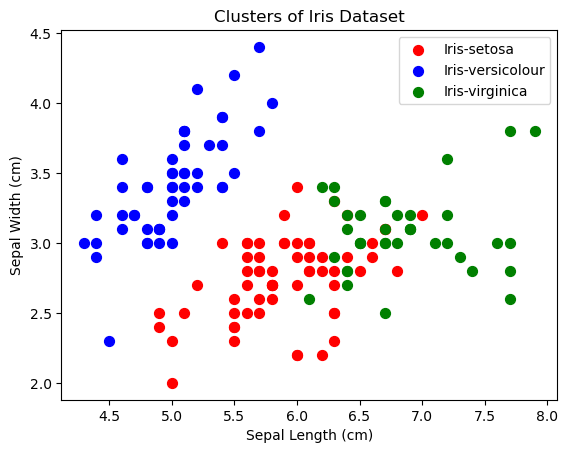

In [23]:
colors = ['red', 'blue', 'green']
labels = ['Iris-setosa', 'Iris-versicolour', 'Iris-virginica']

for i in range(3):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s=50, c=colors[i], label=labels[i])

plt.title('Clusters of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

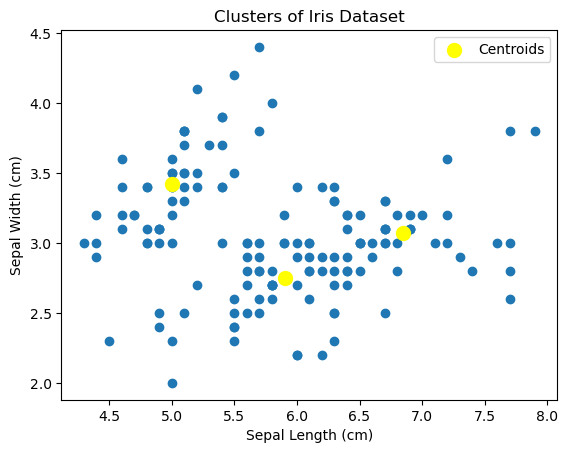

In [24]:
# Plotting the centroids of the clusters
plt. scatter (iris_data['SepalLengthCm'], iris_data['SepalWidthCm' ] )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Clusters of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

## Result Visualize Together

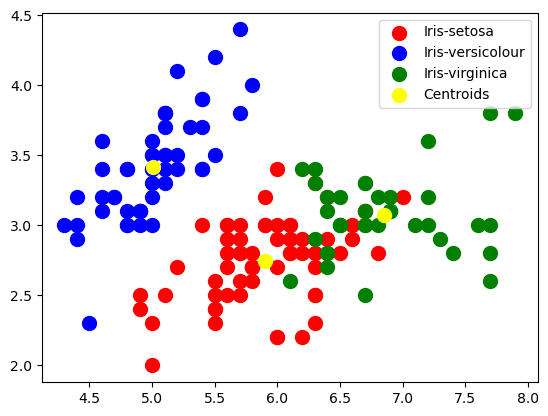

In [25]:
colors = ['red', 'blue', 'green']
labels = ['Iris-setosa', 'Iris-versicolour', 'Iris-virginica']
# Plot each cluster separately
for i in range(3):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], s=100, c=colors[i], label=labels[i])
# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.legend()
plt.show()

## Conclusion

#### The K-means clustering algorithm successfully grouped the Iris dataset into three distinct clusters based on sepal length and width. Each cluster represents a specific species of Iris flowers.


## Thank-you